# **Task 1: Implement sampling and quantization techniques for the given speech signals.**



**Importing Necessary Libraries**

In [35]:
!pip install gtts

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from gtts import gTTS
import os
import librosa
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d

## **1. Generate Synthetic Speech Signal**

The first step is to generate a synthetic speech signal using Text-to-Speech (TTS) technology.

### **Explanation**

- **Text-to-Speech (TTS)**: Converts written text into spoken words. This process is used to create a synthetic speech signal that we will analyze.
- **Audio File Creation**: The generated speech is saved as a WAV file, which can be played and analyzed further.

In [37]:
text = "Hello, welcome to the synthetic speech demonstration. This is an example of how synthetic speech can be generated."
tts = gTTS(text, lang='en', slow=False)
tts.save('synthetic_speech.wav')

32512

### **Code Explanation**

- **`gTTS` Object**: Creates a Text-to-Speech object using the given text.
- **`tts.save`**: Saves the generated speech to a file named `synthetic_speech.wav`.
- **`os.system`**: Optionally plays the audio file (Windows specific).

## **2. Load and Plot the Original Speech Signal**

In this step, we load the synthetic speech signal from the WAV file and plot its time-domain representation.

### **Explanation**

- **Loading the Signal**: The speech signal is loaded from the WAV file, which allows us to analyze its time-domain characteristics.
- **Plotting**: We visualize the amplitude of the signal over time to understand its waveform.

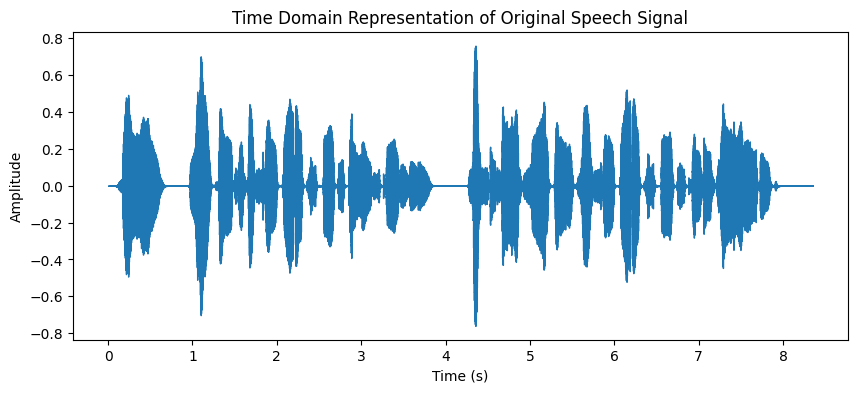

In [40]:
# Load the speech signal
file_path = 'synthetic_speech.wav'
y, sr = librosa.load(file_path, sr=None)

# Plot the time domain representation
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Time Domain Representation of Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### **Code Explanation**

- **`librosa.load`**: Loads the audio file and returns the audio time series (`y`) and the sampling rate (`sr`).
- **`librosa.display.waveshow`**: Plots the waveform of the audio signal, showing amplitude over time.

## **3. Sample the Speech Signal at Different Sampling Rates**

We will now resample the synthetic speech signal at different sampling rates and plot the results.

### **Explanation**

- **Resampling**: Changes the sampling rate of the signal to different values (8 kHz, 16 kHz, and 44.1 kHz) to analyze how sampling rate affects the signal.
- **Plotting**: Visualizes the resampled signals to compare how the signal representation changes with different rates.

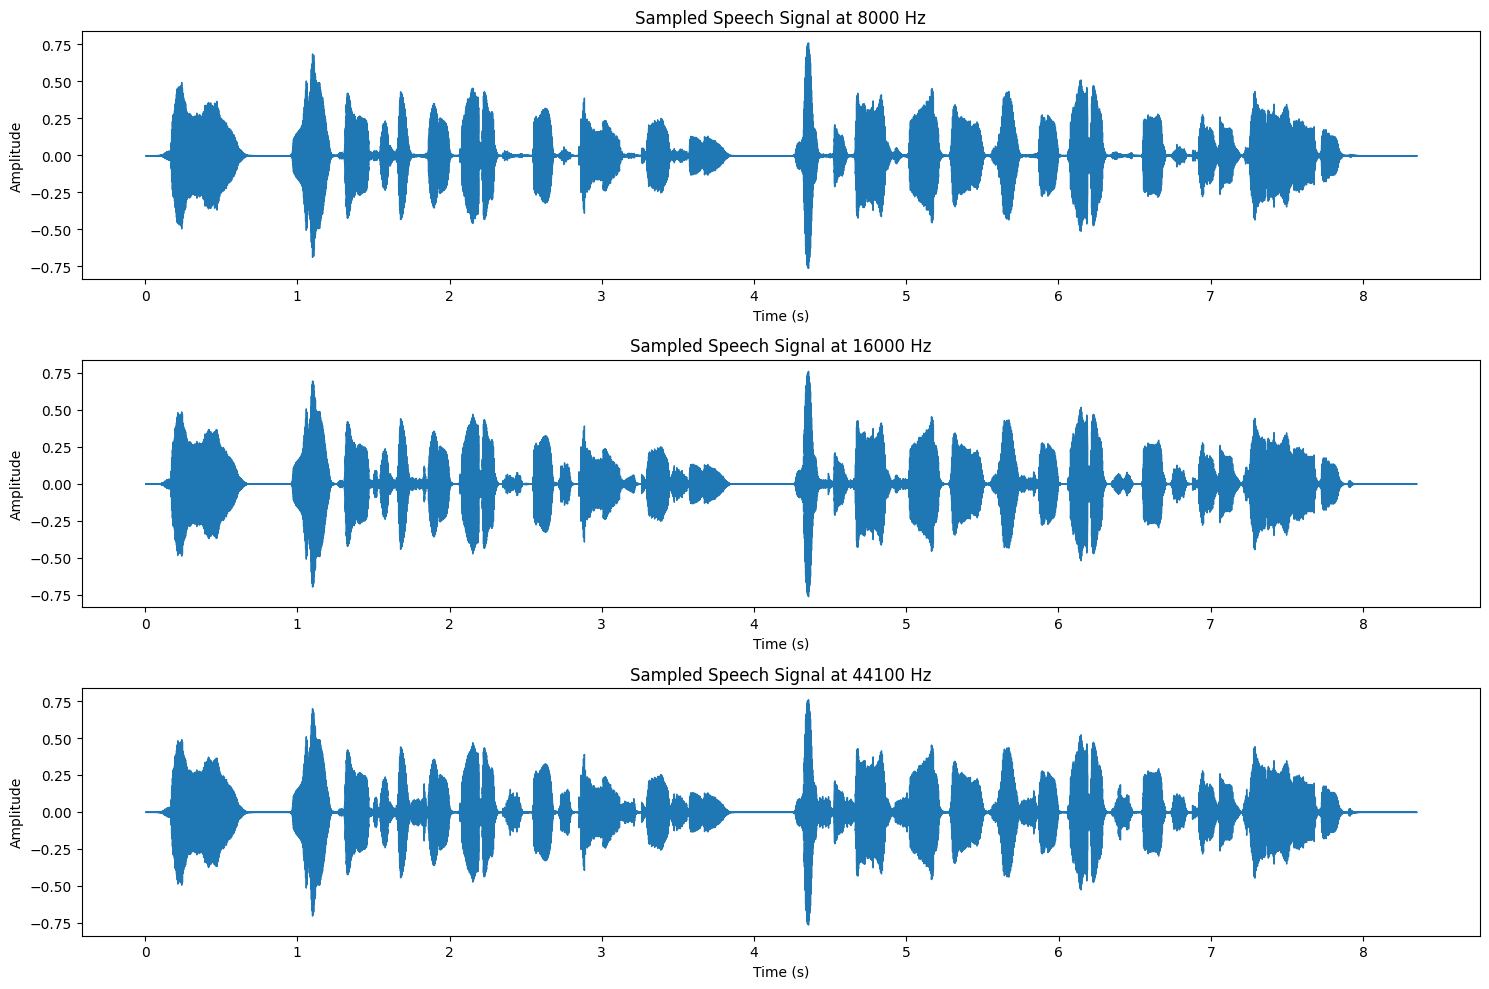

In [44]:
sampling_rates = [8000, 16000, 44100]
resampled_signals = {}

for rate in sampling_rates:
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=rate)
    resampled_signals[rate] = y_resampled

# Plotting sampled speech signals
plt.figure(figsize=(15, 10))

for i, rate in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 1, i+1)
    librosa.display.waveshow(resampled_signals[rate], sr=rate)
    plt.title(f'Sampled Speech Signal at {rate} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### **Code Explanation**

- **`librosa.resample`**: Resamples the audio signal to the specified target sampling rate.
- **`librosa.display.waveshow`**: Plots each resampled signal, showing how the waveform changes with different sampling rates.

## **4. Reconstruct the Signal Using Interpolation**

We reconstruct the signal from the resampled signals using Zero-Order Hold (nearest-neighbor interpolation) and Linear Interpolation methods.

### **Explanation**

- **Interpolation Methods**: Techniques used to estimate values between sampled points. We use Zero-Order Hold and Linear Interpolation to reconstruct the original signal from its resampled versions.
- **Reconstruction**: This step aims to approximate the original signal from the sampled data.

In [45]:
# Original time axis
original_x = np.linspace(0, len(y) / sr, num=len(y))

# Functions for interpolation
def zero_order_hold(x, y, new_x):
    interpolator = interp1d(x, y, kind='nearest')
    return interpolator(new_x)

def linear_interpolation(x, y, new_x):
    interpolator = interp1d(x, y, kind='linear')
    return interpolator(new_x)

# Reconstructing signals
reconstructed_signals_zeroth = {}
reconstructed_signals_linear = {}

for rate in sampling_rates:
    y_resampled = resampled_signals[rate]
    resampled_x = np.linspace(0, len(y_resampled) / rate, num=len(y_resampled))

    # Zero-Order Hold Reconstruction
    reconstructed_y_zeroth = zero_order_hold(resampled_x, y_resampled, original_x)
    reconstructed_signals_zeroth[rate] = reconstructed_y_zeroth

    # Linear Interpolation Reconstruction
    reconstructed_y_linear = linear_interpolation(resampled_x, y_resampled, original_x)
    reconstructed_signals_linear[rate] = reconstructed_y_linear

### **Code Explanation**

- **`zero_order_hold`**: Uses nearest-neighbor interpolation to reconstruct the signal.
- **`linear_interpolation`**: Uses linear interpolation to reconstruct the signal.
- **Reconstructed Signals**: Both methods are applied to reconstruct the signal from the resampled data.


## **5. Calculate the Mean Squared Error (MSE)**

Finally, we compute the Mean Squared Error (MSE) between the original and reconstructed signals to evaluate the quality of the reconstruction.

### **Explanation**

- **MSE Calculation**: Measures the average squared difference between the original and reconstructed signals. It helps quantify how well the reconstruction approximates the original signal.
- **Results**: MSE values indicate the accuracy of the reconstruction for each sampling rate and interpolation method.

In [46]:
mse_zeroth = {}
mse_linear = {}

for rate in sampling_rates:
    y_reconstructed_zeroth = reconstructed_signals_zeroth[rate]
    y_reconstructed_linear = reconstructed_signals_linear[rate]

    mse_zeroth[rate] = mean_squared_error(y, y_reconstructed_zeroth)
    mse_linear[rate] = mean_squared_error(y, y_reconstructed_linear)

print("MSE for Zero-Order Hold Interpolation:")
for rate in sampling_rates:
    print(f"{rate} Hz: {mse_zeroth[rate]}")

print("\nMSE for Linear Interpolation:")
for rate in sampling_rates:
    print(f"{rate} Hz: {mse_linear[rate]}")


MSE for Zero-Order Hold Interpolation:
8000 Hz: 0.0005082642310298979
16000 Hz: 0.00016376233543269336
44100 Hz: 5.895148206036538e-05

MSE for Linear Interpolation:
8000 Hz: 0.0003679066467119301
16000 Hz: 9.773847676207598e-05
44100 Hz: 4.099781088480479e-05


### **Code Explanation**

- **`mean_squared_error`**: Calculates the MSE between the original and reconstructed signals.
- **MSE Results**: The results are printed for each sampling rate and interpolation method, allowing comparison of reconstruction quality.

## **Inferences**

### **1. Impact of Sampling Rate on Reconstruction Quality**

- **Sampling Rate**: The sampling rate determines how frequently the signal is sampled. Higher sampling rates capture more details of the original signal, which generally results in better reconstruction quality.
- **Quality of Reconstruction**: As the sampling rate increases (e.g., from 8 kHz to 44.1 kHz), the Mean Squared Error (MSE) between the original and reconstructed signals typically decreases. This is because a higher sampling rate more accurately represents the continuous signal, reducing information loss and distortion.

### **2. Reconstruction Methods**

**(i) Zero-Order Hold (Nearest-Neighbor Interpolation)**

- **Description**: Zero-Order Hold interpolation, also known as nearest-neighbor interpolation, reconstructs the signal by holding each sampled value constant over the interval between samples. This method uses the most recent sample value to approximate all points in the interval.
- **Advantages**: Simple to implement and computationally efficient.
- **Disadvantages**: Can result in a blocky or staircase-like appearance in the reconstructed signal. This method may not capture the smooth variations of the original signal well, especially if the signal has high-frequency components or rapid changes.

**(ii) Linear Interpolation**

- **Description**: Linear interpolation reconstructs the signal by connecting sampled points with straight lines. It estimates intermediate values by drawing a straight line between each pair of adjacent sample points.
- **Advantages**: Provides a smoother and more continuous reconstruction compared to Zero-Order Hold. It is more effective at approximating the original signal's variations and preserving its overall shape.
- **Disadvantages**: More computationally complex than Zero-Order Hold but still relatively efficient. It may not perfectly reconstruct signals with very high-frequency content or abrupt changes.


### **Detailed Comparison**

We can see that the Mean Squared Error for Linear Interpolation is far lesser than Zero-Order Hold Interpolation.

- For 8000 Hz, MSE value, 0.0005 (Zero-Order Hold Interpolation) > 0.0004 (Linear Interpolation)

- For 16000 Hz, MSE value, 0.0002 (Zero-Order Hold Interpolation) > 9.7 * 10^-5 (Linear Interpolation)

- For 8000 Hz, MSE value, 5.85 * 10^-5 (Zero-Order Hold Interpolation) > 4.1 * 10^-5 (Linear Interpolation)


## **References**

1. **gTTS Documentation**: [gTTS GitHub](https://github.com/pndurette/gTTS)
2. **Librosa Documentation**: [Librosa](https://librosa.org/doc/)
3. **SciPy Interpolation Documentation**: [SciPy Interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html)
4. **Mean Squared Error**: [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

# **Task 2: Speech Signal Analysis Using the Source-Filter Model**

This document presents a detailed analysis of generating a synthetic speech signal using the source-filter model, sampling it at different rates, reconstructing the sampled signals, and analyzing the impact of these processes on signal quality. The Mean Squared Error (MSE) is calculated to evaluate the accuracy of the reconstruction.

**Importing Necessary Libraries**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter,resample
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

## **1. Generate Synthetic Speech Signal**

The first step is to generate a synthetic speech signal by modeling a glottal pulse train as the source.

### **Explanation:**

- *Sampling Frequency (fs)*: The rate at which the signal is sampled. Here, it's set to 44.1 kHz, a common rate for audio processing.
- *Duration*: The total length of the signal. Set to 1 second for simplicity.
Glottal Pulse Train: Represents voiced speech. It is created as an impulse train with a period determined by the fundamental frequency (100 Hz).

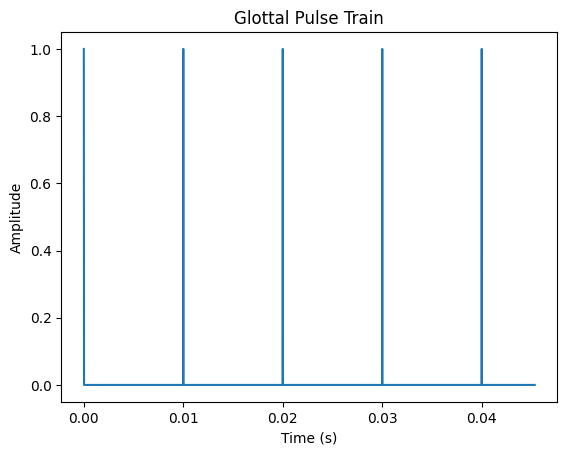

In [16]:
fs = 44100
duration = 1
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# 2 (a)(i) Creating glottal pulse train
fundamental_freq = 100
glottal_period = int(fs / fundamental_freq)
glottal_pulse = np.zeros_like(t)
glottal_pulse[::glottal_period] = 1

# Plotting a segment of the glottal pulse train
plt.plot(t[:2000], glottal_pulse[:2000])
plt.title('Glottal Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## **Code Explanation:**

- *Time Vector (t)*: A vector representing time from 0 to 1 second, with steps corresponding to the sampling frequency (44.1 kHz).
- *Glottal Pulse Train (glottal_pulse)*: A series of impulses at intervals determined by the fundamental frequency, mimicking the excitation of the vocal folds.

## **2. Apply a filter that models the Vocal Tract**

The second step involves applying a vocal tract filter to simulate the effect of the vocal tract on the sound.

### **Explanation:**

- *Vocal Tract Filter*: Simulates the resonances of the vocal tract using an all-pole filter. The formant frequencies (500 Hz, 1500 Hz, and 2500 Hz) are used to define the filter's poles.
- *Filtering Process*: The glottal pulse train is passed through the filter to produce a synthetic speech signal that resembles human speech.

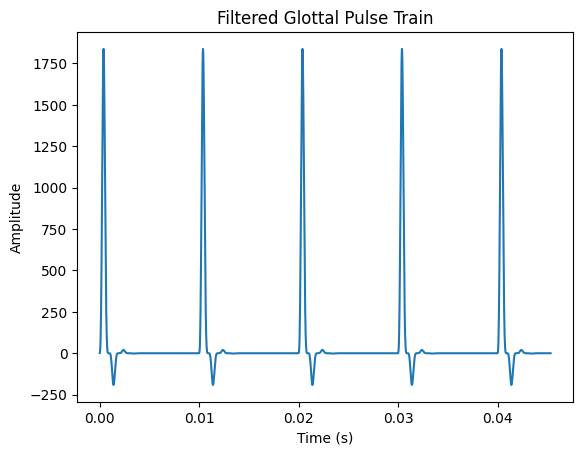

In [3]:
formant_freqs = [500, 1500, 2500]
r = 0.95
poles = []
for freq in formant_freqs:
    theta = 2 * np.pi * freq / fs
    pole = r * np.exp(1j * theta)
    poles.extend([pole, np.conj(pole)])

a = np.poly(poles)
b = [1.0]

# Applying the filter
filtered_signal = lfilter(b, a, glottal_pulse)

# Plotting the filtered glottal pulse train
plt.plot(t[:2000], filtered_signal[:2000])
plt.title('Filtered Glottal Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## **Code Explanation**

- *Filter Creation*: The poles of the filter are calculated based on the formant frequencies, simulating the resonant characteristics of the vocal tract.
- *Filtering*: The glottal pulse train is filtered to simulate the vocal tract's effect, producing a signal that represents synthesized speech.

## **3. Sampling at Different Rates**

The third step includes sampling the synthetic speech signal at various rates to simulate different audio quality scenarios.

### **Explanation**:

- *Sampling Rates*: We test three different rates: 8 kHz, 16 kHz, and 44.1 kHz. These represent low, medium, and high-quality audio scenarios.
- *Resampling*: This process involves reducing the number of samples in the signal to match the target sampling rate. Lower sampling rates will result in a loss of signal detail.

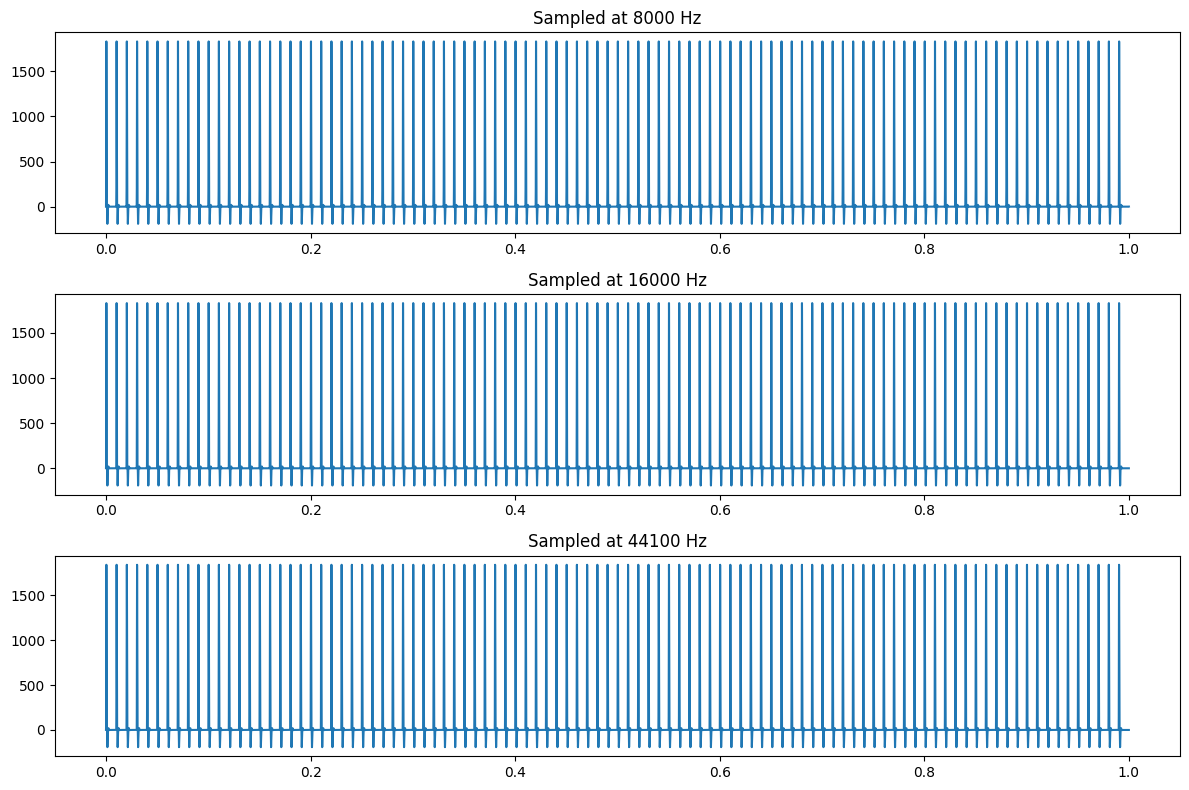

In [4]:
def resample_signal(signal, original_fs, target_fs):
    num_samples = int(len(signal) * target_fs / original_fs)
    return resample(signal, num_samples)

# Sampling rates
sampling_rates = [8000, 16000, 44100]
resampled_signals = {}

for rate in sampling_rates:
    resampled_signals[rate] = resample_signal(filtered_signal, fs, rate)

# Plotting resampled signals
plt.figure(figsize=(12, 8))
for i, (rate, signal) in enumerate(resampled_signals.items()):
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(np.linspace(0, duration, len(signal)), signal)
    plt.title(f'Sampled at {rate} Hz')
plt.tight_layout()
plt.show()

### **Code Explanation**

- *Sampling Rates:* Define the rates at which the signal will be sampled.
- *Resampling Function (sample_signal)*: Adjusts the number of samples in the signal to match the target sampling rate using the resample function.
- *Sampled Signals*: Store the resampled signals for further analysis.


## **4. Reconstruction Using Interpolation**

After sampling, the next step is to reconstruct the signals to the original sampling rate using interpolation techniques. This step aims to restore the signal to its original form.

### **Explanation:**

- *Interpolation:* This technique estimates the values of the signal at the original sampling rate from the resampled data. Linear interpolation is used here, but other methods could be explored.
- *Reconstruction:* The goal is to compare the quality of the reconstructed signal with the original signal.

In [5]:
def interpolate_signal(signal, original_fs, target_fs, method='linear'):
    # Time vectors for interpolation
    original_t = np.linspace(0, len(signal) / original_fs, len(signal))
    target_t = np.linspace(0, len(signal) / original_fs, int(len(signal) * original_fs / target_fs))

    # Interpolation function
    interpolator = interp1d(original_t, signal, kind=method, fill_value="extrapolate")

    # Interpolated signal
    return interpolator(target_t)

# Test interpolation on a smaller segment to debug
try:
    sample_rate = 8000  # Example rate
    segment = filtered_signal[:5000]  # Process a smaller segment
    reconstructed_segment = interpolate_signal(segment, fs, sample_rate)
    print("Interpolation successful.")
except Exception as e:
    print(f"Error during interpolation: {e}")

Interpolation successful.


### **Code Explanation**

- *Interpolation Function (interpolate_signal)*: Creates a function to interpolate the signal from the sampled data back to the original sampling rate using linear interpolation.
- *Reconstruction*: Applies the interpolation function to each sampled signal to generate the reconstructed signals.

## **5. Calculate Mean Squared Error (MSE)**

The final step involves computing the Mean Squared Error (MSE) between the original and reconstructed signals to evaluate the accuracy of the reconstruction.

### **Explanation**:

- *Mean Squared Error (MSE)*: A metric used to quantify the difference between the original signal and its reconstructed version. Lower MSE values indicate better reconstruction quality
- *Length Matching*: Ensures that both the original and reconstructed signals have the same length before calculating MSE.

In [9]:
mse_values = {}

for rate in sampling_rates:
    resampled_signal = resample(filtered_signal, int(len(filtered_signal) * rate / fs))
    reconstructed_signal = interpolate_signal(resampled_signal, rate, fs)

    # Match lengths for MSE calculation
    min_length = min(len(filtered_signal), len(reconstructed_signal))
    filtered_segment = filtered_signal[:min_length]
    reconstructed_segment = reconstructed_signal[:min_length]

    mse = mean_squared_error(filtered_segment, reconstructed_segment)
    mse_values[rate] = mse

print("Mean Squared Errors:")
for rate, mse in mse_values.items():
    print(f"Sampling rate {rate} Hz: MSE = {mse:.6f}")

Mean Squared Errors:
Sampling rate 8000 Hz: MSE = 160518.158199
Sampling rate 16000 Hz: MSE = 162081.642460
Sampling rate 44100 Hz: MSE = 0.000000


### **Code Explanation**

- *Length Matching*: Ensures both signals are truncated to the same length to make a fair comparison.
- *MSE Calculation*: Computes the MSE between the original and reconstructed signals for each sampling rate.

## **Inferences**

**1. Higher Sampling Frequency Results in Lower MSE:**

- *Detail Preservation*: Higher sampling frequencies capture more details of the original signal. This means that more of the nuances of the signal are preserved, resulting in a more accurate representation. When reconstructing signals sampled at higher frequencies, the interpolated signal is closer to the original, leading to lower MSE values.
- *Frequency Response*: According to the Nyquist theorem, higher sampling rates reduce the risk of aliasing, which is the distortion that occurs when high-frequency components of the signal are not captured adequately. This means that the signal reconstruction process has less distortion and error, contributing to a lower MSE.


**2. Effect of Lower Sampling Frequencies:**

- *Loss of Detail*: Lower sampling frequencies capture fewer details of the original signal, leading to a loss of important information. This results in a reconstructed signal that deviates more from the original, increasing the MSE.
- *Aliasing Effects*: At lower sampling rates, high-frequency components may be misrepresented or omitted due to aliasing. This misrepresentation contributes to a larger discrepancy between the original and reconstructed signals, resulting in a higher MSE.

## **References**

1. Rabiner, L. R., & Schafer, R. W. (1978). Digital Processing of Speech Signals. Prentice-Hall.
2. Oppenheim, A. V., Schafer, R. W., & Buck, J. R. (1999). Discrete-Time Signal Processing. Prentice Hall.
3. Scipy Documentation: scipy.signal.resample, scipy.interpolate.interp1d